<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# Stochastic Gradient Descent Regression with Scale and PowerTransformer

This code template is for Regression analysis with data rescaling technique as Scale and Feature transformation technique as PowerTransformer

### Required Packages

In [56]:
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,scale,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.linear_model import SGDRegressor
warnings.filterwarnings('ignore')

### Initialization
Filepath of CSV file

In [57]:
#filepath
file_path= ""

List of features which are  required for model training .

In [58]:
#x_values
features=[]

Target feature for prediction.

In [59]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [60]:
df=pd.read_csv(file_path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1,1352300580,20141114T000000,247000.0,1,1.00,460,4120,1.0,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990,4120
2,1320069249,20141020T000000,192500.0,1,1.00,470,63737,1.0,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350,46762
3,1437500015,20140709T000000,150000.0,3,0.75,490,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800,18297
4,859000110,20141002T000000,125000.0,1,1.00,500,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [61]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [62]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [63]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1,1,1.00,460,4120,1.0,0,0,3,4,460,0,1937,0,98055,47.4868,-122.199,990,4120
2,1,1.00,470,63737,1.0,0,2,5,5,470,0,1924,0,98022,47.2163,-121.984,1350,46762
3,3,0.75,490,38500,1.5,0,0,4,5,490,0,1959,0,98014,47.7112,-121.315,800,18297
4,1,1.00,500,7440,1.0,0,0,1,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

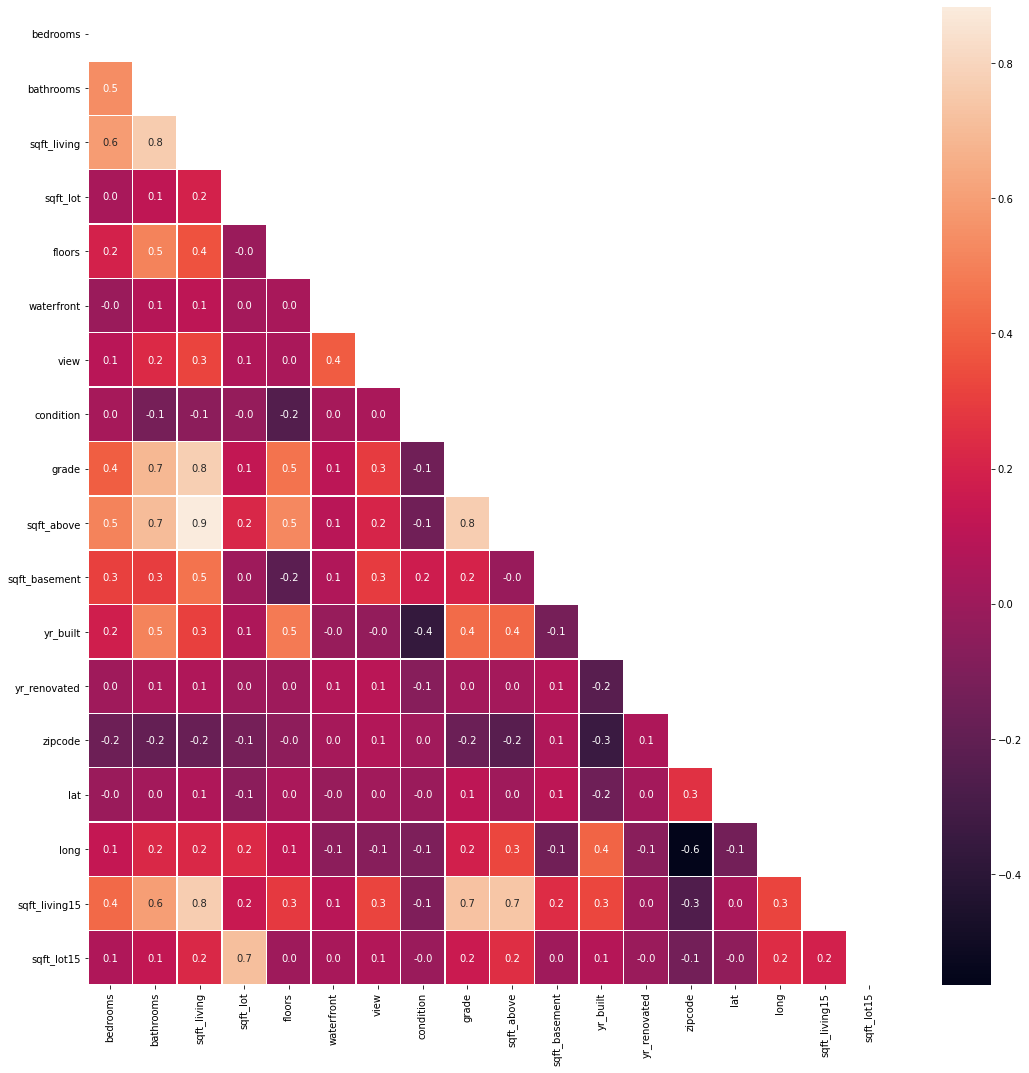

In [64]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Data Scaling
Standardize a dataset along any axis.

Center to the mean and component wise scale to unit variance.

[For more Reference](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)


### Feature Transformation
Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

[For more Reference](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

In [66]:
x_train = scale(x_train)
x_test = scale(x_test)

### Model

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model. Often, an instance of SGDClassifier or SGDRegressor will have an equivalent estimator in the scikit-learn API, potentially using a different optimization technique.


For example, using SGDRegressor(loss='squared_loss', penalty='l2') and Ridge solve the same optimization problem, via different means.

#### Model Tuning Parameters
> - **loss** -> The loss function to be used. The possible values are ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
> - **penalty** -> The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.
> - **alpha** -> Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to learning_rate is set to ‘optimal’.
> - **l1_ratio** -> The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty is ‘elasticnet’.
> - **tol** -> The stopping criterion
> - **learning_rate** -> The learning rate schedule,possible values {'optimal','constant','invscaling','adaptive'}
> - **eta0** -> The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.
> - **power_t** -> The exponent for inverse scaling learning rate.
> - **epsilon** -> Epsilon in the epsilon-insensitive loss functions; only if loss is ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.

In [67]:
model=make_pipeline(PowerTransformer(),SGDRegressor(random_state=123))
model.fit(x_train,y_train)

Pipeline(steps=[('powertransformer', PowerTransformer()),
                ('sgdregressor', SGDRegressor(random_state=123))])

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.


In [68]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 5.64 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [69]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 5.64 %
Mean Absolute Error 342268.67
Mean Squared Error 147385946644.81


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

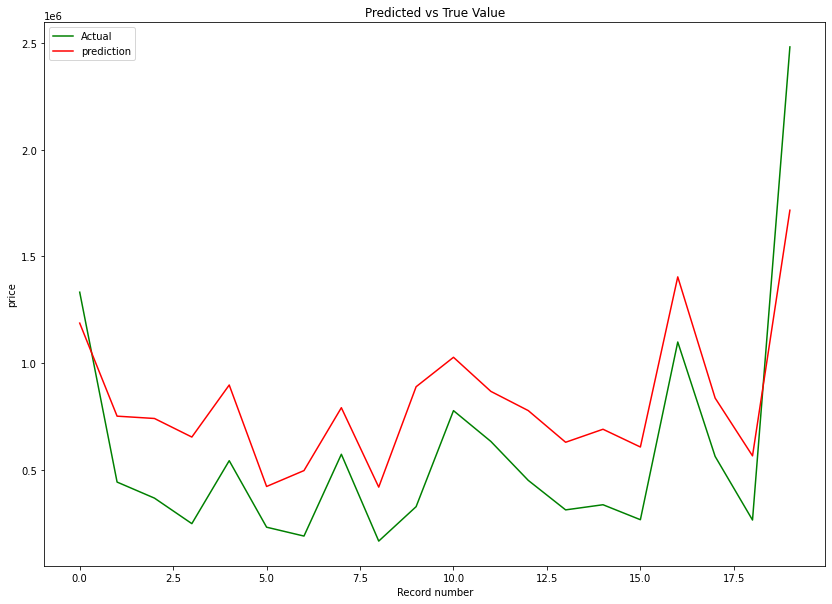

In [70]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(x_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Jay Shimpi , Github: [Profile](https://github.com/JayShimpi22)